# I HATE this Product! Five Stars!
##### Reducing Rating Inflation Using NLP
Author: Tom Chapman

## Business Understanding
Since their inception, online marketplaces have fundamentally shifted how consumers shop. With a near limitless number of products and services available online, it has never been easier to avoid the hassle of brick-and-mortar stores. However, identifying which products or services are high-quality has become increasingly difficult. The popularity of the 5-star rating scale has led to a number of well-documented challenges. [Harvard Business Review](https://hbr.org/2019/07/the-problems-with-5-star-rating-systems-and-how-to-fix-them) summed these challenges up nicely as follows:

- There is little incentive for consumers to provide truthful feedback, meaning that extreme experiences (whether positive or negative) are much more likely to lead a consumer to leave a review.
- Compounding the lack of incentive for truth, 5-star rating scales are prone to grade inflation. There is no correlation between the star-rating and the sentiment the user expresses in a review. It's possible (and surprisingly common) for a user to hate a product, excoriate it in a review, and then rate it 5-stars. This leads to inflated ratings, and makes it harder for the consumer to understand the meaning behind varied product ratings. How much better is a product with a 4.7 star rating than a 4.5 star average rating?

My model is intended to help address rating inflation by classifying user feedback as positive or negative based on its content. 

Amazon is the largest online marketplace currently in existence, and its challenges with rating inflation are well-documented. However, any marketplace that uses a five-star rating system (Google Play, Apple App Store, Wal-mart, Etsy, Rakuten, etc.) can utilize my model to reclassify user reviews into positive or negative polarity. Offering customers a clearer display of product quality allows customers to make more informed purchases, and should drive improved satisfaction. It should also help mitigate poor quality or scam sellers inherently, as poor reviews are less likely to be drowned out by inflated ratings.

The tool is also useful for sellers that want to move away from Amazon or implement their own storefront. By implementing my algorithm in a newly-created storefront, sellers can mostly automate the classification of consumer feedback and derive a more accurate understanding of how their products or services are being received. On [average](https://fitsmallbusiness.com/amazon-seller-fees/), Amazon sellers pay the website about 15% of their sale price on each item sold. There’s no question the visibility and customer reach that Amazon provides is valuable, but 15% is an extremely hefty cost for small companies. For certain product categories, the cost per item can range as high as 45%, an enormous amount to pay simply for the storefront component of the site.


## Data Preparation



In [2]:
# Package Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, make_scorer, recall_score, accuracy_score, precision_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV, cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

from imblearn.pipeline import Pipeline as ImPipeline

import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read in the data
df = pd.read_csv('../data/train_cleaned_10sw.csv', index_col=0)

In [4]:
df.head()

,sentiment,text,text_cleaned,toks,bigrams,trigrams
0,2,This sound track was beautiful! It paints the ...,sound track beautiful paint senery mind well w...,"['sound', 'track', 'beautiful', 'paint', 'sene...","[('sound', 'track'), ('track', 'beautiful'), (...","[('sound', 'track', 'beautiful'), ('track', 'b..."
1,2,I'm reading a lot of reviews saying that this ...,i'm reading lot review say best game soundtrac...,"[""i'm"", 'reading', 'lot', 'review', 'say', 'be...","[(""i'm"", 'reading'), ('reading', 'lot'), ('lot...","[(""i'm"", 'reading', 'lot'), ('reading', 'lot',..."
2,2,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hand intense sa...,"['soundtrack', 'favorite', 'music', 'time', 'h...","[('soundtrack', 'favorite'), ('favorite', 'mus...","[('soundtrack', 'favorite', 'music'), ('favori..."
3,2,I truly like this soundtrack and I enjoy video...,truly soundtrack enjoy video game music play g...,"['truly', 'soundtrack', 'enjoy', 'video', 'gam...","[('truly', 'soundtrack'), ('soundtrack', 'enjo...","[('truly', 'soundtrack', 'enjoy'), ('soundtrac..."
4,2,"If you've played the game, you know how divine...",played game know divine music every single son...,"['played', 'game', 'know', 'divine', 'music', ...","[('played', 'game'), ('game', 'know'), ('know'...","[('played', 'game', 'know'), ('game', 'know', ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600000 entries, 0 to 3599999
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   sentiment     int64 
 1   text          object
 2   text_cleaned  object
 3   toks          object
 4   bigrams       object
 5   trigrams      object
dtypes: int64(1), object(5)
memory usage: 192.3+ MB


In [6]:
df['sentiment'].value_counts()

2    1800000
1    1800000
Name: sentiment, dtype: int64

In [7]:
max_features = None

In [8]:
print(df.isna().sum())
df[df['text_cleaned'].isna()]

sentiment        0
text             0
text_cleaned    23
toks             0
bigrams          0
trigrams         0
dtype: int64


,sentiment,text,text_cleaned,toks,bigrams,trigrams
217919,2,ò ñàìà ì áèìà ñí è íí ñàìé áèìé äèñ . ß ìíäó ñ...,NaN,[],[],[]
294435,2,............ ..... ..... ...... ...... ..........,NaN,[],[],[]
556297,2,it's very good ... .... ... ... ... ... ... .....,NaN,[],[],[]
629878,1,...............................,NaN,[],[],[]
680354,2,ò äèí è ñàì ìè áèì ìèò. à ò ññèè èàò ìà èäàò ä...,NaN,[],[],[]
1440939,1,|||||||||||||||||||| |||||||||| ||||||||||||||...,NaN,[],[],[]
1786231,2,38493 34740 47383 37054 48624 78568? 18581 286...,NaN,[],[],[]
1989004,2,&#4315;&#4304;&#4306;&#4304;&#4320;&#4312;&#43...,NaN,[],[],[]
2005370,1,&#1575;&#1606;&#1578;&#1605; &#1594;&#1610;&#1...,NaN,[],[],[]
2071299,2,&#1042;&#1089;&#1077; &#1087;&#1088;&#1080;&#1...,NaN,[],[],[]


In [9]:
# Drop rows with missing text_cleaned values
df.dropna(inplace=True)

In [10]:
# Save off feature combinations for use in model iteration
X = df['text_cleaned']

X_bigrams = df[['text_cleaned', 'bigrams']]
X_trigrams = df[['text_cleaned', 'trigrams']]
X_allgrams = df[['text_cleaned', 'bigrams', 'trigrams']]

y = df['sentiment']

# Modeling
I utilized a number of sklearn's modeling techniques for the project, and performed grid searches to optimize the hyperparameters of the best-performing model. As noted in the data-preparation description, I experimented with the inclusion of bi-grams and tri-grams created from user input during the modeling process as well. Ultimately...

### Dummy Classifier
To begin modelling efforts, I built a dummy classifier that simply guesses the most common class every time. Given that our training data is almost (but not perfectly) balanced, we should expect it to predict that every review is negative since there are slightly more negative reviews than positive reviews. If we can't beat a 50-50 guess with a dataset this large, something is horribly wrong. Predictably, the dummy classifier achieved an accuracy score of almost exactly 50%.

In [12]:
# Instantiate Dummy Classifier pipeline
dummy_pipe = ImPipeline(steps=[
                                ('vect', TfidfVectorizer()),
                                ('cf', DummyClassifier(strategy='most_frequent',
                                                           random_state=42))
                              ]
)

0.5000012500079861


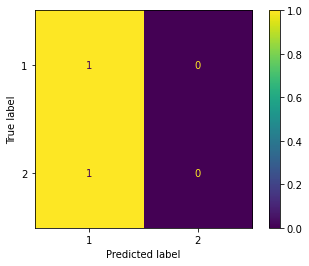

In [16]:
# Fit dummy pipe on the training data and plot confusion matrix
dummy_pipe.fit(X, y)
dummy_yhat = dummy_pipe.predict(X)
plot_confusion_matrix(dummy_pipe, X, y, normalize='true');
print(accuracy_score(y, dummy_yhat))

### Multinomial Naive Bayes
MNB is a commonly-used algorithm for natural language processing due to effectiveness in classifying topics while maintaining a low training time and relative simplicity. It predicts the probability that a given document belongs to a particular class based on the words it contains. I employed a multinomial naive bayes classifier as my first simple model for these reasons. 

0.8284569595861306


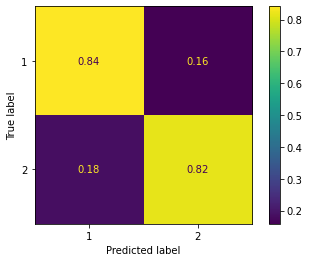

In [95]:
# Instantiate the Multinomial Naieve Bayes Pipeline
mnb_pipe = ImPipeline(steps=[
                            ('vect', TfidfVectorizer()),
                            ('cf', MultinomialNB())
                            ]
)

# Fit MNB pipe on the training data, get predictions and plot confusion matrix
mnb_pipe.fit(X, y)
mnb_yhat = mnb_pipe.predict(X)
plot_confusion_matrix(mnb_pipe, X, y, normalize='true');
print(accuracy_score(y, mnb_yhat))

In [96]:
# Obtained cross-validated accuracy score
mnb_cv = cross_validate(mnb_pipe, X, y)
print(mnb_cv)

{'fit_time': array([59.93719602, 60.34596586, 60.66885376, 61.08734393, 60.55913281]), 'score_time': array([14.63465381, 14.61485004, 14.57370687, 14.37041283, 14.29333615]), 'test_score': array([0.81850038, 0.81476842, 0.81272648, 0.81008618, 0.81112924])}


- 'fit_time': 63.91176295, 64.27754903, 63.07658076, 62.96271181, 63.14784789
- 'score_time': 14.80177712, 14.56706309, 14.5999763 , 14.49988723, 14.33135796
- 'test_score': 0.81850038, 0.81476842, 0.81272648, 0.81008618, 0.81112924

In [97]:
mnb_cv['test_score'].mean()

0.8134421396624155

In [98]:
# Stored classification report for comparison
mnb_cr = classification_report(y, mnb_yhat, output_dict=True)

In [182]:
# Define model_performance Dictionary for use in visualizations, add mean model result.
mod_perf = {}
mod_perf['mnb_1grams'] = mnb_cv['test_score'].mean()

#### Using N-grams as Features
To see if I could improve on the model's performance over using single words, I tried giving it bi-grams and tri-grams as additional features. Ultimately, the MNB classifier was most accurate using only single words from each review as its inputs.

##### Single Words & Bi-Grams

0.8266186145078149


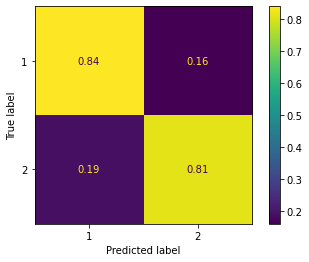

In [40]:
# Instantiate the MNB Pipeline with cleaned text and bi-grams
mnb_bigrams_pipe = ImPipeline(steps=[
            ('CT', ColumnTransformer([(x, TfidfVectorizer(), x) for x in ['text_cleaned',
                                                                          'bigrams']
                                     ])),
            ('cf', MultinomialNB())
]
)

# Fit MNB pipe on the cleaned text and bi-grams, get predictions, plot confusion matrix
mnb_bigrams_pipe.fit(X_bigrams, y)
mnb_bigrams_yhat = mnb_bigrams_pipe.predict(X_bigrams)
plot_confusion_matrix(mnb_bigrams_pipe, X_bigrams, y, normalize='true');
print(accuracy_score(y, mnb_bigrams_yhat))

In [83]:
# Obtained cross-validated accuracy score
mnb_bigrams_cv = cross_validate(mnb_bigrams_pipe, X_bigrams, y)
print(mnb_bigrams_cv)

{'fit_time': array([165.68346977, 165.27084804, 165.68405008, 167.4976089 ,
       167.15829587]), 'score_time': array([40.79754901, 40.48855972, 40.37639904, 40.53613615, 39.66455317]), 'test_score': array([0.81641981, 0.81257257, 0.81074869, 0.80822783, 0.80911812])}


In [184]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(mnb_bigrams_cv['test_score'].mean())
mod_perf['mnb_2grams'] = mnb_bigrams_cv['test_score'].mean()

0.8114174045674252


In [94]:
# Stored classification report for comparison
mnb_bigram_cr = classification_report(y, mnb_bigrams_yhat, output_dict=True)

##### Single Words & Tri-Grams

0.8252197166815233


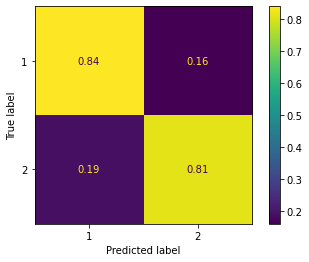

In [45]:
# Instantiate the Multinomial Naive Bayes Pipeline with clean text and tri-grams
mnb_trigrams_pipe = ImPipeline(steps=[
                ('CT', ColumnTransformer([(x, TfidfVectorizer(), x) for x in ['text_cleaned',
                                                                              'trigrams']
                                         ])),
                ('cf', MultinomialNB())
]
)

# Fit MNB pipe on the training data, get predictions and plot confusion matrix
mnb_trigrams_pipe.fit(X_trigrams, y)
mnb_trigrams_yhat = mnb_trigrams_pipe.predict(X_trigrams)
plot_confusion_matrix(mnb_trigrams_pipe, X_trigrams, y, normalize='true');
print(accuracy_score(y, mnb_trigrams_yhat))

In [84]:
# Obtained cross-validated accuracy score
mnb_trigrams_cv = cross_validate(mnb_trigrams_pipe, X_trigrams, y)
print(mnb_trigrams_cv)

{'fit_time': array([200.59661388, 202.12438822, 202.82885408, 200.65367198,
       200.49102902]), 'score_time': array([52.92166996, 52.99233294, 52.078264  , 51.56884813, 51.21316791]), 'test_score': array([0.81493231, 0.81093089, 0.80936534, 0.80674171, 0.80772089])}


In [185]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(mnb_trigrams_cv['test_score'].mean())
mod_perf['mnb_3grams'] = mnb_trigrams_cv['test_score'].mean()

0.8099382284979203


In [93]:
# Stored classification report for comparison
mnb_trigram_cr = classification_report(y, mnb_trigrams_yhat, output_dict=True)

##### Single Words, Bi-Grams & Tri-Grams

0.8249244370172365


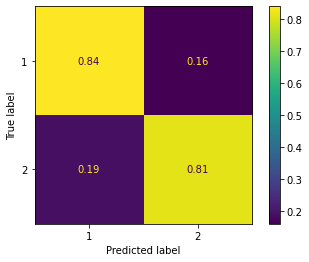

In [46]:
# Instantiate the Multinomial Naieve Bayes pipeline with clean text, bi-grams and tri-grams
mnb_allgrams_pipe = ImPipeline(steps=[          
                ('CT', ColumnTransformer([(x, TfidfVectorizer(), x) for x in ['text_cleaned',
                                                                              'bigrams',
                                                                              'trigrams']
                                         ])),
                ('cf', MultinomialNB())
]
)

# Fit MNB pipe on the training data, get predictions and plot confusion matrix
mnb_allgrams_pipe.fit(X_allgrams, y)
mnb_allgrams_yhat = mnb_allgrams_pipe.predict(X_allgrams)
plot_confusion_matrix(mnb_allgrams_pipe, X_allgrams, y, normalize='true');
print(accuracy_score(y, mnb_allgrams_yhat))

In [85]:
# Obtained cross-validated accuracy score
mnb_allgrams_cv = cross_validate(mnb_allgrams_pipe, X_allgrams, y)
print(mnb_allgrams_cv)

{'fit_time': array([306.38464785, 307.10650492, 304.84020615, 306.92882609,
       310.19934583]), 'score_time': array([77.10728216, 76.17751193, 74.49804282, 73.80406976, 74.56061912]), 'test_score': array([0.81458786, 0.81061839, 0.80896256, 0.80640004, 0.80740283])}


In [186]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(mnb_allgrams_cv['test_score'].mean())
mod_perf['mnb_allgrams'] = mnb_allgrams_cv['test_score'].mean()

0.8095943374033844


In [92]:
# Stored classification report for comparison
mnb_allgram_cr = classification_report(y, mnb_allgrams_yhat, output_dict=True)

{'1': {'precision': 0.8163975753379082, 'recall': 0.8384004826685437, 'f1-score': 0.8272527489394266, 'support': 1799993}, '2': {'precision': 0.8339236938986179, 'recall': 0.8114483239851021, 'f1-score': 0.82253250497824, 'support': 1799984}, 'accuracy': 0.8249244370172365, 'macro avg': {'precision': 0.8251606346182631, 'recall': 0.8249244033268229, 'f1-score': 0.8248926269588333, 'support': 3599977}, 'weighted avg': {'precision': 0.8251606127104749, 'recall': 0.8249244370172365, 'f1-score': 0.8248926328591759, 'support': 3599977}}


### Logistic Regression

XXXX

0.8751636468788551


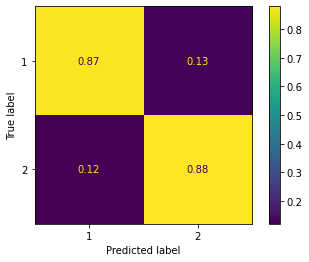

In [55]:
# Instantiate the Logistic Regression Pipeline
logreg_pipe = ImPipeline(steps=[
                                 ('vect', TfidfVectorizer()),                              
                                 ('lr', LogisticRegression(n_jobs=-2))
                                ]
)


# Fit Logistic Regression pipeline on the training data, get predictions and plot confusion matrix
logreg_pipe.fit(X, y)
logreg_yhat = logreg_pipe.predict(X)
plot_confusion_matrix(logreg_pipe, X, y, normalize='true');
print(accuracy_score(y, logreg_yhat))

In [56]:
# Obtained cross-validated accuracy score
logreg_cv = cross_validate(logreg_pipe, X, y)
print(logreg_cv)

{'fit_time': array([114.21418595, 114.09646702, 115.54381633, 114.64121985,
       117.13762307]), 'score_time': array([15.40786219, 15.56365013, 14.99344087, 15.42947602, 15.36008501]), 'test_score': array([0.8693465 , 0.86867149, 0.86920881, 0.86898103, 0.86918798])}


In [188]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(logreg_cv['test_score'].mean())
mod_perf['logreg_1grams'] = logreg_cv['test_score'].mean()

0.8690791636003059


In [68]:
# Stored classification report for comparison
logreg_bigram_cr = classification_report(y, logreg_yhat, output_dict=True)

{'1': {'precision': 0.878248376336949,
  'recall': 0.8710867208928035,
  'f1-score': 0.8746528889568204,
  'support': 1799993},
 '2': {'precision': 0.8721288041519578,
  'recall': 0.8792405932497178,
  'f1-score': 0.875670259272969,
  'support': 1799984},
 'accuracy': 0.8751636468788551,
 'macro avg': {'precision': 0.8751885902444534,
  'recall': 0.8751636570712606,
  'f1-score': 0.8751615741148947,
  'support': 3599977},
 'weighted avg': {'precision': 0.8751885978939674,
  'recall': 0.8751636468788551,
  'f1-score': 0.8751615728431735,
  'support': 3599977}}

In [64]:
with open ('logreg_base_pkl', 'wb') as files:
    pickle.dump(logreg_pipe, files)

##### Single Words & Bi-Grams

0.8809209058835654


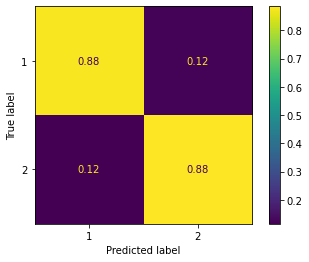

In [69]:
# Instantiated the Logistic Regression Pipeline with clean text and bi-grams
logreg_bigram_pipe = ImPipeline(steps=[
                ('CT', ColumnTransformer([(x, TfidfVectorizer(), x) for x in ['text_cleaned',
                                                                              'bigrams']
                                         ])),                             
                ('lr', LogisticRegression(n_jobs=-2))
]
)


# Fit Logistic Regression pipeline on the training data, get predictions and plot confusion matrix
logreg_bigram_pipe.fit(X_bigrams, y)
logreg_bigram_yhat = logreg_bigram_pipe.predict(X_bigrams)
plot_confusion_matrix(logreg_bigram_pipe, X_bigrams, y, normalize='true');
print(accuracy_score(y, logreg_bigram_yhat))

In [71]:
# Obtained cross-validated accuracy score
logreg_bigram_cv = cross_validate(logreg_bigram_pipe, X_bigrams, y)
print(logreg_bigram_cv)

{'fit_time': array([256.42639899, 254.64559007, 258.30169702, 257.96054196,
       261.62226987]), 'score_time': array([42.41855788, 42.41570783, 41.90626884, 41.13741493, 40.51680422]), 'test_score': array([0.86957844, 0.86892427, 0.87004354, 0.87050605, 0.87038104])}


In [190]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(logreg_bigram_cv['test_score'].mean())
mod_perf['logreg_2grams'] = logreg_bigram_cv['test_score'].mean()

0.869886669073337


In [72]:
# Stored classification report for comparison
logreg_bigram_cr = classification_report(y, logreg_bigram_yhat, output_dict=True)

##### Single Words & Tri-Grams

0.8799042327214869


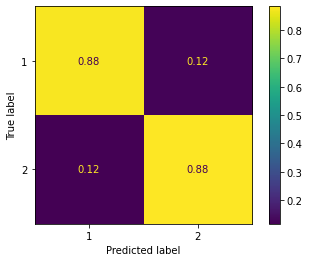

In [17]:
# Instantiate the Logistic Regression Pipeline with clean text and tri-grams
logreg_trigram_pipe = ImPipeline(steps=[
                ('CT', ColumnTransformer([(x, TfidfVectorizer(), x) for x in ['text_cleaned',
                                                                              'trigrams']
                                         ])),                             
                ('lr', LogisticRegression(n_jobs=-2))
]
)


# Fit LogReg pipeline on the training data, get predictions and plot confusion matrix
logreg_trigram_pipe.fit(X_trigrams, y)
logreg_trigram_yhat = logreg_trigram_pipe.predict(X_trigrams)
plot_confusion_matrix(logreg_trigram_pipe, X_trigrams, y, normalize='true');
print(accuracy_score(y, logreg_trigram_yhat))

In [18]:
# Obtained cross-validated accuracy score
logreg_trigram_cv = cross_validate(logreg_trigram_pipe, X_trigrams, y)
print(logreg_trigram_cv)

{'fit_time': array([319.58547306, 320.60429096, 306.76699996, 305.10402417,
       306.97201991]), 'score_time': array([54.03763199, 54.19823408, 52.28183699, 51.88448787, 53.32923794]), 'test_score': array([0.86993817, 0.86910344, 0.87035743, 0.87063938, 0.8709741 ])}


In [19]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(logreg_trigram_cv['test_score'].mean())
mod_perf['logreg_3grams'] = logreg_trigram_cv['test_score'].mean()

0.8702025044502794


NameError: name 'mod_perf' is not defined

In [20]:
# Stored classification report for comparison
logreg_trigram_cr = classification_report(y, logreg_trigram_yhat, output_dict=True)

In [23]:
# Save model for future use
with open('logreg_trigram_model.pkl', 'wb') as files:
    joblib.dump(logreg_trigram_pipe, files)

##### Single Words, Bi-Grams & Tri-Grams

0.8783483894480437


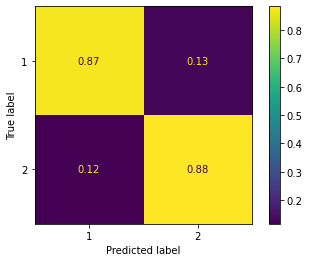

In [76]:
# Instantiate the LR Pipeline with clean text, bi-grams and tri-grams
logreg_allgram_pipe = ImPipeline(steps=[
                ('CT', ColumnTransformer([(x, TfidfVectorizer(), x) for x in ['text_cleaned',
                                                                              'bigrams',
                                                                              'trigrams']
                                         ])),                             
                ('lr', LogisticRegression(n_jobs=-2))
]
)


# Fit Logistic Regression pipeline on the training data, get predictions and plot confusion matrix
logreg_allgram_pipe.fit(X_allgrams, y)
logreg_allgram_yhat = logreg_allgram_pipe.predict(X_allgrams)
plot_confusion_matrix(logreg_allgram_pipe, X_allgrams, y, normalize='true');
print(accuracy_score(y, logreg_allgram_yhat))

In [77]:
# Obtained cross-validated accuracy score
logreg_allgram_cv = cross_validate(logreg_allgram_pipe, X_allgrams, y)
print(logreg_allgram_cv)

{'fit_time': array([441.34930778, 445.38985896, 440.52547002, 437.61527085,
       446.4825151 ]), 'score_time': array([84.24083519, 82.72586107, 80.61095977, 80.71986508, 81.2115581 ]), 'test_score': array([0.87029233, 0.86916038, 0.87022549, 0.8706116 , 0.87051577])}


In [193]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(logreg_allgram_cv['test_score'].mean())
mod_perf['logreg_allgrams'] = logreg_allgram_cv['test_score'].mean()

0.8701611151597666


In [82]:
# Stored classification report for comparison
logreg_allgram_cr = classification_report(y, logreg_allgram_yhat, output_dict=True)

In [ ]:
# Save model for future use
with open('logreg_allgram_model.pkl', 'wb') as files:
    joblib.dump(logreg_trigram_pipe, files)

### Linear Support Vector Machine - Stochastic Gradient Descent
Stochastic gradient descent is another technique that is very common in natural language processing due to its efficiency. Rather than calculating the gradient at each iteration using every observation in the dataset, it selects one observation at random for each step, drastically reducing the computational requirements. It also works very well with sparse data, which makes it a natural fit for NLP. Given the size of my dataset, SGD was a natural next step and XXXX...

0.8508276580655932


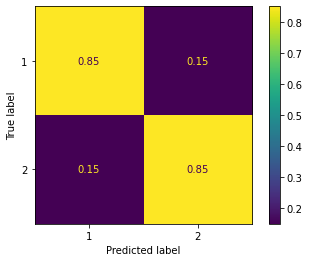

In [99]:
# Instantiate the SGDC Classifier pipeline
sgdc_pipe = ImPipeline(steps=[
                            ('vect', TfidfVectorizer()),
                            ('cf', SGDClassifier(random_state=42))
                            ]
)

#Fit SGDC pipe on the training data, get predictions and plot confusion matrix
sgdc_pipe.fit(X, y)
sgdc_yhat = sgdc_pipe.predict(X)
plot_confusion_matrix(sgdc_pipe, X, y, normalize='true');
print(accuracy_score(y, sgdc_yhat))

In [101]:
# Obtained cross-validated accuracy score
sgdc_cv = cross_validate(sgdc_pipe, X, y)
print(sgdc_cv)

{'fit_time': array([70.9188869 , 70.56865573, 70.59446096, 70.62523794, 70.94255495]), 'score_time': array([14.57960916, 14.56181717, 14.42929196, 14.28333306, 14.25776196]), 'test_score': array([0.84893944, 0.84923944, 0.85029202, 0.85031702, 0.85053785])}


- 'fit_time': array([70.02949595, 70.80230594, 70.30221891, 70.43828201, 70.43610787])
- 'score_time': array([14.75940609, 14.66371202, 14.59122682, 14.39158106, 14.41444707])
- 'test_score': array([0.84893944, 0.84923944, 0.85029202, 0.85031702, 0.85053785])

In [194]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(sgdc_cv['test_score'].mean())
mod_perf['sgdc_1grams'] = sgdc_cv['test_score'].mean()

0.8498651523472027


In [103]:
# Stored classification report for comparison
sgdc_cr = classification_report(y, sgdc_yhat, output_dict=True)

In [104]:
with open ('sgdc_base_pkl', 'wb') as files:
    pickle.dump(sgdc_pipe, files)

#### Using N-grams as Features 
To see if I could improve on the model's performance over using single words, I tried giving it bi-grams and tri-grams as additional features. Ultimately XXXX

##### Single Words & Bi-Grams

0.8554932434290552


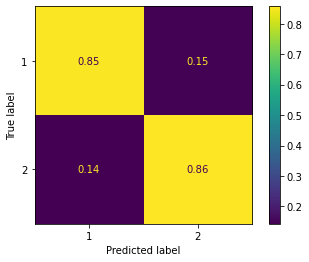

In [105]:
# Instantiate the SGDC pipeline with cleaned text and bi-grams
sgdc_bigrams_pipe = ImPipeline(steps=[
                ('CT', ColumnTransformer([(x, TfidfVectorizer(), x) for x in ['text_cleaned',
                                                                              'bigrams']
                                         ])),
                ('cf', SGDClassifier(random_state=42))
]
)

# Fit SGDC pipe on the training data, get predictions and plot confusion matrix
sgdc_bigrams_pipe.fit(X_bigrams, y)
sgdc_bigrams_yhat = sgdc_bigrams_pipe.predict(X_bigrams)
plot_confusion_matrix(sgdc_bigrams_pipe, X_bigrams, y, normalize='true');
print(accuracy_score(y, sgdc_bigrams_yhat))

In [106]:
sgdc_bigrams_cv = cross_validate(sgdc_bigrams_pipe, X_bigrams, y)
print(sgdc_bigrams_cv)

{'fit_time': array([194.557055  , 196.03704762, 198.00457811, 194.15118504,
       192.81769395]), 'score_time': array([47.48983693, 47.93900418, 47.92801571, 46.29329705, 45.14519215]), 'test_score': array([0.85379641, 0.85340335, 0.85447954, 0.85464482, 0.85457399])}


In [195]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(sgdc_bigrams_cv['test_score'].mean())
mod_perf['sgdc_2grams'] = sgdc_bigrams_cv['test_score'].mean()

0.8541796242474566


In [108]:
# Stored classification report for comparison
sgdc_bigrams_cr = classification_report(y, sgdc_bigrams_yhat, output_dict=True)

##### Single Words & Tri-Grams

0.8546649048035585


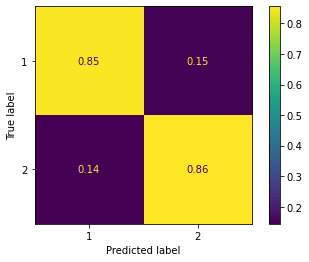

In [109]:
# Instantiate the SGDC pipeline with clean text and tri-grams
sgdc_trigrams_pipe = ImPipeline(steps=[
                ('CT', ColumnTransformer([(x, TfidfVectorizer(), x) for x in ['text_cleaned',
                                                                              'trigrams']
                                                             ])),                             
                ('cf', SGDClassifier(random_state=42))
]
)

# Fit SGDC pipe on the training data, get predictions and plot confusion matrix
sgdc_trigrams_pipe.fit(X_trigrams, y)
sgdc_trigrams_yhat = sgdc_trigrams_pipe.predict(X_trigrams)
plot_confusion_matrix(sgdc_trigrams_pipe, X_trigrams, y, normalize='true');
print(accuracy_score(y, sgdc_trigrams_yhat))

In [110]:
sgdc_trigrams_cv = cross_validate(sgdc_trigrams_pipe, X_trigrams, y)
print(sgdc_trigrams_cv)

{'fit_time': array([210.78691769, 210.38276672, 212.07414508, 213.50089383,
       212.00431919]), 'score_time': array([52.77859306, 52.51626801, 52.17830181, 51.95252109, 51.36808896]), 'test_score': array([0.85288668, 0.85257418, 0.85366565, 0.85390593, 0.85383926])}


In [197]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(sgdc_trigrams_cv['test_score'].mean())
mod_perf['sgdc_3grams'] = sgdc_trigrams_cv['test_score'].mean()

0.853374341360464


In [112]:
# Stored classification report for comparison
sgdc_trigrams_cr = classification_report(y, sgdc_trigrams_yhat, output_dict=True)

##### Single Words, Bi-Grams & Tri-Grams

0.8573693665265084


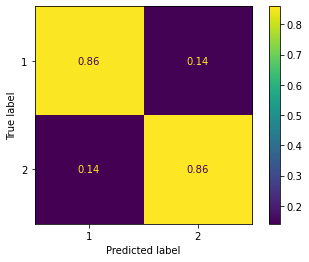

In [113]:
# Instantiate the SGDC pipeline with clean text, bi-grams and tri-grams
sgdc_allgrams_pipe = ImPipeline(steps=[
                ('CT', ColumnTransformer([(x, TfidfVectorizer(), x) for x in ['text_cleaned',
                                                                              'bigrams',
                                                                              'trigrams']
                                                             ])),                             
                ('cf', SGDClassifier(random_state=42))
]
)

# Fit SGDC pipe on the training data, get predictions and plot confusion matrix
sgdc_allgrams_pipe.fit(X_allgrams, y)
sgdc_allgrams_yhat = sgdc_allgrams_pipe.predict(X_allgrams)
plot_confusion_matrix(sgdc_allgrams_pipe, X_allgrams, y, normalize='true');
print(accuracy_score(y, sgdc_allgrams_yhat))

In [114]:
# Obtained cross-validated accuracy score
sgdc_allgrams_cv = cross_validate(sgdc_allgrams_pipe, X_allgrams, y)
print(sgdc_allgrams_cv)

{'fit_time': array([318.87678099, 318.22864795, 318.05015278, 318.43812895,
       320.31453919]), 'score_time': array([81.30805206, 80.16387606, 79.20117211, 78.30957198, 78.81106901]), 'test_score': array([0.85553531, 0.85510475, 0.85598511, 0.85637122, 0.85617539])}


In [198]:
# Print cross-validated mean accuracy score & add to model performance dictionary
print(sgdc_allgrams_cv['test_score'].mean())
mod_perf['sgdc_allgrams'] = sgdc_allgrams_cv['test_score'].mean()

0.8558343570052406


In [116]:
# Stored classification report for comparison
sgdc_allgrams_cr = classification_report(y, sgdc_allgrams_yhat, output_dict=True)

In [117]:
with open ('sgdc_allgrams_pkl', 'wb') as files:
    pickle.dump(sgdc_allgrams_pipe, files)

#### Hyperparameter Tuning

In [246]:
# XXXX
sgdc_params = {
            'cf__alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
            'cf__loss': ['hinge', 'log', 'huber'],
            'cf__penalty': ['l2', 'l1', 'elasticnet'],
            #"CT__transformers__'(text_cleaned, TfidfVectorizer(), text_cleaned)[1]'__max_features": [None, 50000, 100000, 200000]
             }

In [ ]:
# XXXX
sgdc_gs = GridSearchCV(sgdc_allgrams_pipe, param_grid=sgdc_params, n_jobs=-2, verbose=3, cv=3)
sgdc_gs.fit(X_allgrams, y)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


In [ ]:
sgdc_gs.best_params_

In [ ]:
logreg_params = {
            'cf__alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
            'cf__loss': ['hinge', 'log', 'huber'],
            'cf__penalty': ['l2', 'l1', 'elasticnet'],
          #  "CT__transformers__'(text_cleaned, TfidfVectorizer(), text_cleaned)[1]'__max_features": [None, 50000, 100000, 200000]
             }

In [ ]:
logreg_gs = GridSearchCV(logreg_trigrams_pipe, param_grid=logreg_params, n_jobs=-2, verbose=3, cv=3)
logreg_gs.fit(X_trigrams, y)

In [178]:
sgdc_allgrams_pipe.get_params()

{'memory': None,
 'steps': [('CT',
   ColumnTransformer(transformers=[('text_cleaned', TfidfVectorizer(),
                                    'text_cleaned'),
                                   ('bigrams', TfidfVectorizer(), 'bigrams'),
                                   ('trigrams', TfidfVectorizer(), 'trigrams')])),
  ('cf', SGDClassifier(random_state=42))],
 'verbose': False,
 'CT': ColumnTransformer(transformers=[('text_cleaned', TfidfVectorizer(),
                                  'text_cleaned'),
                                 ('bigrams', TfidfVectorizer(), 'bigrams'),
                                 ('trigrams', TfidfVectorizer(), 'trigrams')]),
 'cf': SGDClassifier(random_state=42),
 'CT__n_jobs': None,
 'CT__remainder': 'drop',
 'CT__sparse_threshold': 0.3,
 'CT__transformer_weights': None,
 'CT__transformers': [('text_cleaned', TfidfVectorizer(), 'text_cleaned'),
  ('bigrams', TfidfVectorizer(), 'bigrams'),
  ('trigrams', TfidfVectorizer(), 'trigrams')],
 'CT__verbose': Fa

In [160]:
type(sgdc_allgrams_pipe.named_steps.CT.transformers[0][1])

sklearn.feature_extraction.text.TfidfVectorizer

In [128]:
sgdc_allgrams_pipe.named_steps.CT

ColumnTransformer(transformers=[('text_cleaned', TfidfVectorizer(),
                                 'text_cleaned'),
                                ('bigrams', TfidfVectorizer(), 'bigrams'),
                                ('trigrams', TfidfVectorizer(), 'trigrams')])

In [ ]:
# Instantiate the SDGC Classifier pipeline
sgdc_tuned_pipe = ImPipeline(steps=[
                            ('vect', TfidfVectorizer(max_features=50000,
                                                    #max_df=0.95,
                                                   # min_df=0.05
                                                    )),
                            ('cf', SGDClassifier(random_state=42,
                                                  alpha=0.0001,
                                                  loss = 'hinge',
                                                  penalty='l2'
                                                  ))
                            ]
)

#Fit SGDC pipe on the training data, get predictions and plot confusion matrix
sgdc_tuned_pipe.fit(X, y)
sgdc_tuned_yhat = sgdc_tuned_pipe.predict(X)
plot_confusion_matrix(sgdc_tuned_pipe, X, y, normalize='true');
print(accuracy_score(y, sgdc_tuned_yhat))

In [ ]:
# Obtained cross-validated accuracy score
cross_validate(sgdc_pipe, X_grams, y)

In [ ]:
with open ('sgdc_tuned_pkl', 'wb') as files:
    pickle.dump(sgdc_tuned_pipe, files)

In [216]:
mod_perf_df = pd.DataFrame.from_dict(mod_perf, orient='index')

In [218]:
#mod_perf_df.reset_index()
#mod_perf_df.to_csv('../data/model_performance.csv')

In [32]:
mod_perf={'mnb_1grams': 0.8134421396624155,
          'mnb_2grams': 0.8114174045674252,
          'mnb_3grams': 0.8099382284979203,
          'mnb_allgrams': 0.8095943374033844,
          'logreg_1grams': 0.8690791636003059,
          'logreg_2grams': 0.869886669073337,
          'logreg_3grams': 0.8702025044502794,
          'logreg_allgrams': 0.8701611151597666,
          'sgdc_1grams': 0.8498651523472027,
          'sgdc_2grams': 0.8541796242474566,
          'sgdc_3grams': 0.853374341360464,
          'sgdc_allgrams': 0.8558343570052406}

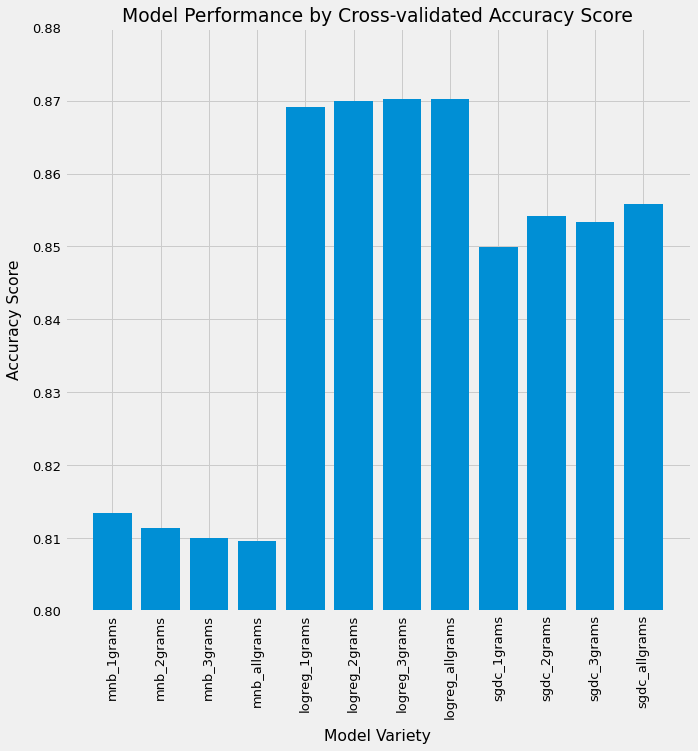

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 13})
plt.axis([None, None, 0.8, 0.88])

ax.bar(mod_perf.keys(), mod_perf.values())
ax.set_title('Model Performance by Cross-validated Accuracy Score')
ax.set_ylabel('Accuracy Score', labelpad=10)
ax.set_xlabel('Model Variety', labelpad=10)

ax.tick_params(axis="x", rotation=90)

## Final Model Evaluation
The logstic regression model that received a combination of 1-grams and 3-grams had the highest accuracy score on the training data, so I selected it as the appropriate model for this task. The model's accuracy was only very slightly (0.0004%) better than a similarly-configured model that received 1-grams, 2-grams and 3-grams. However slight the margin, when combined with the fact that it requires significantly less data and therefore a shorter cleaning process, its superiority becomes clear.

The model appears to generalize quite well, as it produced an accuracy score of 86.8% on completely unseen data, as compared to cross-validated accuracy of 87% on the training data. It correctly classified 88% of positive reviews and 86% of negative reviews in the test data, suggesting that it is slightly more accurate at determining positive sentiment than negative sentiment. Given the size of the training set, it is not surprising to see a strong f1 score as well. The model avoids significant weaknesses with false positives or negatives, and significantly reduces the number of reviews that would require human review.


- Score
- what did it do well
- what are its shortcomings
- how well does it solve the business problem?

In [27]:
# Read in the test data
df_test = pd.read_csv('../data/test_cleaned_10sw.csv', index_col=0)

In [23]:
print(df_test.isna().sum())
df_test[df_test['text_cleaned'].isna()]

sentiment       0
text            0
text_cleaned    1
bigrams         0
trigrams        0
dtype: int64


,sentiment,text,text_cleaned,bigrams,trigrams
369851,2,&#26379;&#21451; &#24478;&#32654; &#22283; &#2...,NaN,[],[]


In [64]:
df_test.dropna(inplace=True)

In [25]:
# Save off feature combinations in the same pattern used for training
X_test = df_test['text_cleaned']

X_test_bigrams = df_test[['text_cleaned', 'bigrams']]
X_test_trigrams = df_test[['text_cleaned', 'trigrams']]
X_test_allgrams = df_test[['text_cleaned', 'bigrams', 'trigrams']]

y_test = df_test['sentiment']

In [31]:
# Load best-performing model from file
with open('logreg_trigram_model.pkl', 'rb') as f:
    logreg_trigram_pipe = joblib.load(f)

In [26]:
# Score the final model on the test data
logreg_trigram_pipe.score(X_test_trigrams, y_test)

0.8683396708491771

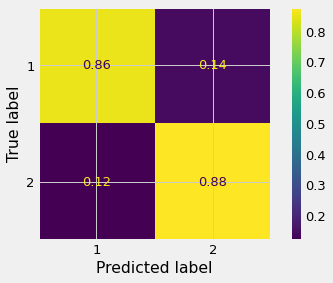

In [49]:
plot_confusion_matrix(logreg_trigram_pipe, X_test_trigrams, y_test, normalize='true');

In [50]:
yhat_test = logreg_trigram_pipe.predict(X_test_trigrams)

In [52]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           1       0.88      0.86      0.87    200000
           2       0.86      0.88      0.87    199999

    accuracy                           0.87    399999
   macro avg       0.87      0.87      0.87    399999
weighted avg       0.87      0.87      0.87    399999



Let's see how it does on text from another source--

In [54]:
yhat_test

array([2, 2, 1, ..., 2, 2, 1])

In [56]:
yhat_test.reshape()

[2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,


In [65]:
df_test['preds'] = list(yhat_test)

In [70]:
pd.set_option("max_colwidth", None)
df_test[df_test['preds'] != df_test['sentiment']].head()

,sentiment,text,text_cleaned,bigrams,trigrams,preds
3,2,"Check out Maha Energy's website. Their Powerex MH-C204F charger works in 100 minutes for rapid charge, with option for slower charge (better for batteries). And they have 2200 mAh batteries.",check maha energy's website powerex mh c f charger work minute rapid charge option slow charge well battery mah battery,"[('check', 'maha'), ('maha', ""energy's""), (""energy's"", 'website'), ('website', 'powerex'), ('powerex', 'mh'), ('mh', 'c'), ('c', 'f'), ('f', 'charger'), ('charger', 'work'), ('work', 'minute'), ('minute', 'rapid'), ('rapid', 'charge'), ('charge', 'option'), ('option', 'slow'), ('slow', 'charge'), ('charge', 'well'), ('well', 'battery'), ('battery', 'mah'), ('mah', 'battery')]","[('check', 'maha', ""energy's""), ('maha', ""energy's"", 'website'), (""energy's"", 'website', 'powerex'), ('website', 'powerex', 'mh'), ('powerex', 'mh', 'c'), ('mh', 'c', 'f'), ('c', 'f', 'charger'), ('f', 'charger', 'work'), ('charger', 'work', 'minute'), ('work', 'minute', 'rapid'), ('minute', 'rapid', 'charge'), ('rapid', 'charge', 'option'), ('charge', 'option', 'slow'), ('option', 'slow', 'charge'), ('slow', 'charge', 'well'), ('charge', 'well', 'battery'), ('well', 'battery', 'mah'), ('battery', 'mah', 'battery')]",1
9,1,"Firstly,I enjoyed the format and tone of the book (how the author addressed the reader). However, I did not feel that she imparted any insider secrets that the book promised to reveal. If you are just starting to research law school, and do not know all the requirements of admission, then this book may be a tremendous help. If you have done your homework and are looking for an edge when it comes to admissions, I recommend some more topic-specific books. For example, books on how to write your personal statment, books geared specifically towards LSAT preparation (Powerscore books were the most helpful for me), and there are some websites with great advice geared towards aiding the individuals whom you are asking to write letters of recommendation. Yet, for those new to the entire affair, this book can definitely clarify the requirements for you.",firstly enjoy format tone book author address reader however feel imparted insider secret book promise reveal start research law school know requirement admission book may tremendous help do homework look edge come admission recommend topic specific book example book write personal statment book gear specifically towards lsat preparation powerscore book helpful websites great advice gear towards aid individual ask write letter recommendation yet new entire affair book definitely clarify requirement,"[('firstly', 'enjoy'), ('enjoy', 'format'), ('format', 'tone'), ('tone', 'book'), ('book', 'author'), ('author', 'address'), ('address', 'reader'), ('reader', 'however'), ('however', 'feel'), ('feel', 'imparted'), ('imparted', 'insider'), ('insider', 'secret'), ('secret', 'book'), ('book', 'promise'), ('promise', 'reveal'), ('reveal', 'start'), ('start', 'research'), ('research', 'law'), ('law', 'school'), ('school', 'know'), ('know', 'requirement'), ('requirement', 'admission'), ('admission', 'book'), ('book', 'may'), ('may', 'tremendous'), ('tremendous', 'help'), ('help', 'do'), ('do', 'homework'), ('homework', 'look'), ('look', 'edge'), ('edge', 'come'), ('come', 'admission'), ('admission', 'recommend'), ('recommend', 'topic'), ('topic', 'specific'), ('specific', 'book'), ('book', 'example'), ('example', 'book'), ('book', 'write'), ('write', 'personal'), ('personal', 'statment'), ('statment', 'book'), ('book', 'gear'), ('gear', 'specifically'), ('specifically', 'towards'), ('towards', 'lsat'), ('lsat', 'preparation'), ('preparation', 'powerscore'), ('powerscore', 'book'), ('book', 'helpful'), ('helpful', 'websites'), ('websites', 'great'), ('great', 'advice'), ('advice', 'gear'), ('gear', 'towards'), ('towards', 'aid'), ('aid', 'individual'), ('individual', 'ask'), ('ask', 'write'), ('write', 'letter'), ('letter', 'recomm